# Graph making for prefitted Gaussian profiles

This is how to make gaussian graphs for maser profiles previously fitted in programs like AIPS, CASA, or GBTIDL. 

There's two different codes that you can adapt for if you have one gaussian or multiple gaussians for your fitting.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import pandas as pd
import scipy.optimize as op
%matplotlib inline

plt.rcParams['figure.dpi'] = 120

mpl.rcParams['figure.figsize'] = 8, 7 # can change your figure sizes
mpl.rcParams.update({'font.size':10}) # can change font size on figure

from scipy.stats import norm
# THIS IS FOR ALL THE LIBRARIES NEEDED TO DO THE CODING

In [12]:
# What you need to do next is load in the .xslx file with your information
data1 = pd.read_excel('mas4.xlsx') # This is my example file, put your own here

In [13]:
## This is a function to create gaussians previously fitted
## This does NOT find the best fit
def gaussfit(x,a,b,c):
    
    ## this creates a gaussian fit when 
    ## the x axis is given, amplitude a, 
    ## central velocity b, and FWHM c
    ##
    ## returns the gaussian fit
    
    A = a
    B = b
    C = c / (math.sqrt(8*math.log(2)))
    f_x= A*np.exp(-(x-B)**2 / (2*C**2))
    gaussum = f_x 

    return gaussum

[-0.323677204, 1.00483442, -5, 300]

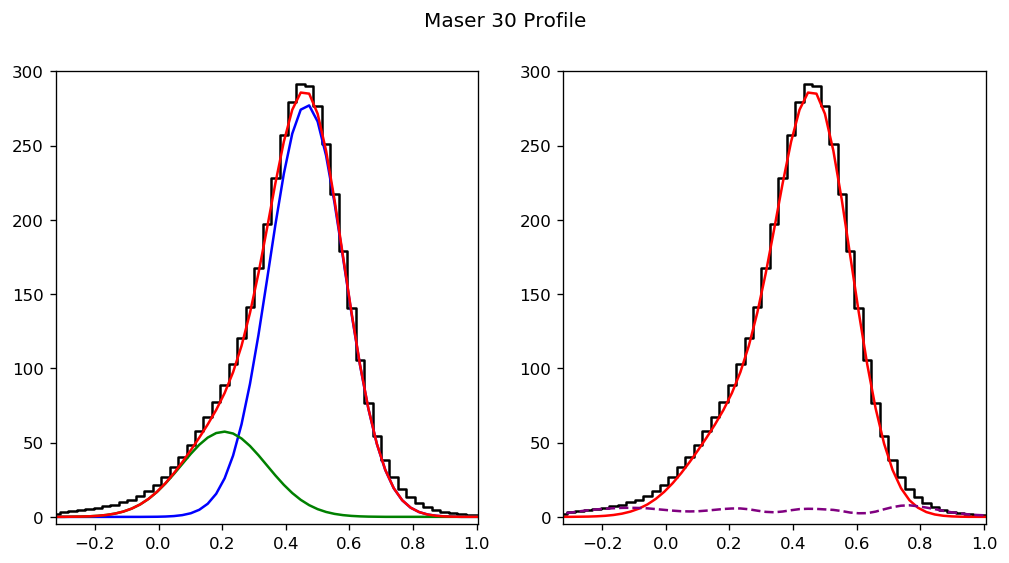

In [17]:
# The next thing you do is use the matplotlib package to plot with all your gaussian values 
# put into the equation
#maser 30
data1 = pd.read_excel('mas30.xlsx') #reads in value
data1['coord.value'] = data1['coord.value'] /1000 # my values had to be addapted slightly

# can read in your own data or
x = np.linspace(data1['coord.value'][0], data1['coord.value'][len(data1)-1], len(data1))

# along the x axis in the size of your data set.

## The next two cubes are for gaussian fitting
a = 277.66
b = .4656
c = .279 
f_x=gaussfit(x,a,b,c)


a = 57.42
b = .2058
c = .3165 
f_x1=gaussfit(x,a,b,c)

gaussum = f_x + f_x1 # This is for summing the two gaussian components.


plt.rcParams['figure.dpi'] = 120 
mpl.rcParams['figure.figsize'] = 10, 5 
mpl.rcParams.update({'font.size':10})


## All that follows here allows you to do two graphs in one line if there are two gaussians fitted.
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Maser 30 Profile') #Title of the graphs
resid = data1['avg over area'] - gaussum # Residual line
ax1.step(data1['coord.value'][:], data1['avg over area'][:], where='mid', color='black') 
ax1.plot(x, f_x, color = 'blue') # plots on the first graph
ax1.axis([-.323677204,1.004834420, -5, 300]) # Allows you to chose the axis for the first graph
ax1.plot(x,f_x1,color = 'green') 
ax1.plot(x, gaussum, color='red')
ax2.step(data1['coord.value'][:], data1['avg over area'][:], where='mid', color='black')
ax2.plot(x, gaussum, color='red')
## Residuals line
ax2.plot(x,resid, color ='purple', linestyle='dashed')
ax2.axis([-.323677204,1.004834420, -5, 300])




Sometimes you have only one gaussian, so use code like this to do just one graph:


No handles with labels found to put in legend.


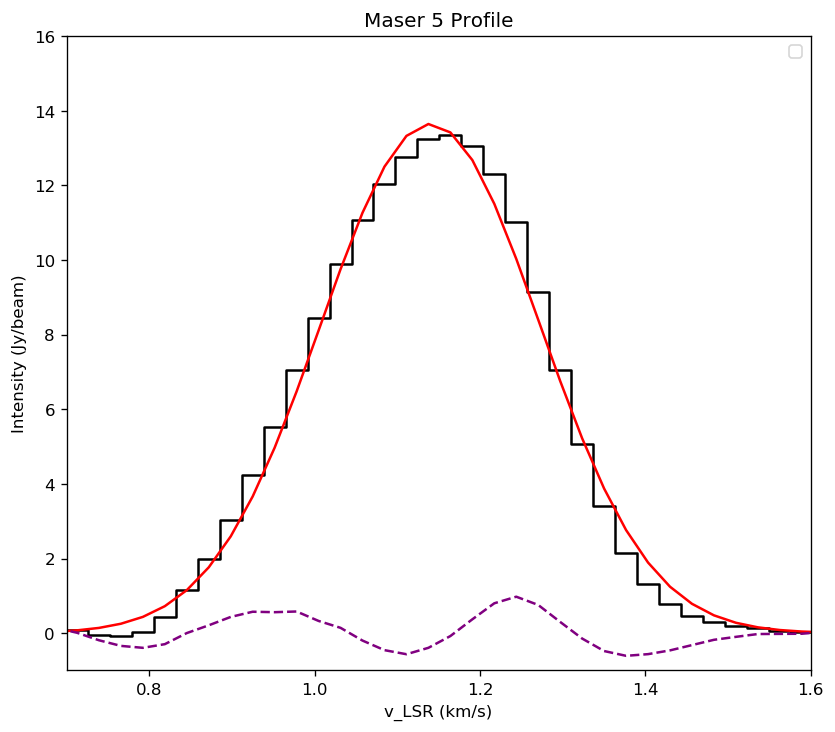

In [16]:
#maser 5
data1 = pd.read_excel('mas5.xlsx') # this reads in a new file
data1['coord.value'] = data1['coord.value'] /1000

x = np.linspace(data1['coord.value'][0], data1['coord.value'][len(data1)-1], len(data1))
a = 13.65
b = 1.140
c = .312 
f_x= gaussfit(x,a,b,c)



gaussum = f_x 
## Once again this is for figure sizing
plt.rcParams['figure.dpi'] = 120
mpl.rcParams['figure.figsize'] = 8, 7
mpl.rcParams.update({'font.size':10})


resid = data1['avg over area'] - gaussum #residal fit
plt.step(data1['coord.value'][:], data1['avg over area'][:], where='mid', color='black')
plt.plot(x, gaussum, color='red')
plt.plot(x,resid, color ='purple', linestyle='dashed') #resid plot
plt.axis([.700,1.600, -1, 16]) 

plt.ylabel('Intensity (Jy/beam)') 
plt.xlabel('v_LSR (km/s)') 

plt.title('Maser 5 Profile') 
# plt.legend()

